In [13]:
%matplotlib inline

import pandas as pd
import numpy as np
from numpy import clip, full, fill_diagonal
from numpy.random import uniform, multivariate_normal, seed
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
import seaborn as sns
seed(42)
sns.set_style('white')

In [23]:
# Compute Distance Metrics
def get_distance_metrics(points):
    """Calculate mean of pairwise distances and mean of min pairwise distances"""

    # squareform : reform as symmetric matrix
    pairwise_dist = squareform(pdist(points))
    # fill diagonal value
    fill_diagonal(pairwise_dist, np.nanmean(pairwise_dist, axis=1))
    avg_distance = np.mean(np.nanmean(pairwise_dist, axis=1))
    fill_diagonal(pairwise_dist, np.nanmax(pairwise_dist, axis=1))
    avg_min_distance = np.mean(np.nanmin(pairwise_dist, axis=1))
    return avg_distance, avg_min_distance

# Simulate Distances
def simulate_distances(m, n, mean, var, corr):
    """Draw m random vectors of dimension n from uniform and normal distributions
        and return pairwise distance metrics"""
    uni_dist = get_distance_metrics(uniform(size=(m, n)))
    cov = full(shape=(n, n), fill_value=var * corr)

    fill_diagonal(cov, var)
    normal_points = multivariate_normal(full(shape=(n,), fill_value=mean), cov, m)
    normal_points = clip(normal_points, a_min=0, a_max=1)
    norm_dist = get_distance_metrics(normal_points)
    return uni_dist, norm_dist

# Sampling Parameters
n_points = 1000
min_dim, max_dim, step = 1, 2502, 100 # for 2500 features
dimensions = range(min_dim, max_dim, step)

# Normal Distribution Params
mean = 0.5
var = (mean/3)**2 # 99% of sample in [0, 1]
corr = 0.25

In [24]:
# Run Simulation
col_names = ['Avg. Uniform', 'Min. Uniform', 'Avg. Normal', 'Min. Normal']
avg_dist = []
for dim in dimensions:
    uni_dist, norm_dist = simulate_distances(n_points, dim, mean, var, corr)
    avg_dist.append([*uni_dist, *norm_dist])

distances = pd.DataFrame(data=avg_dist, columns=col_names, index=dimensions)

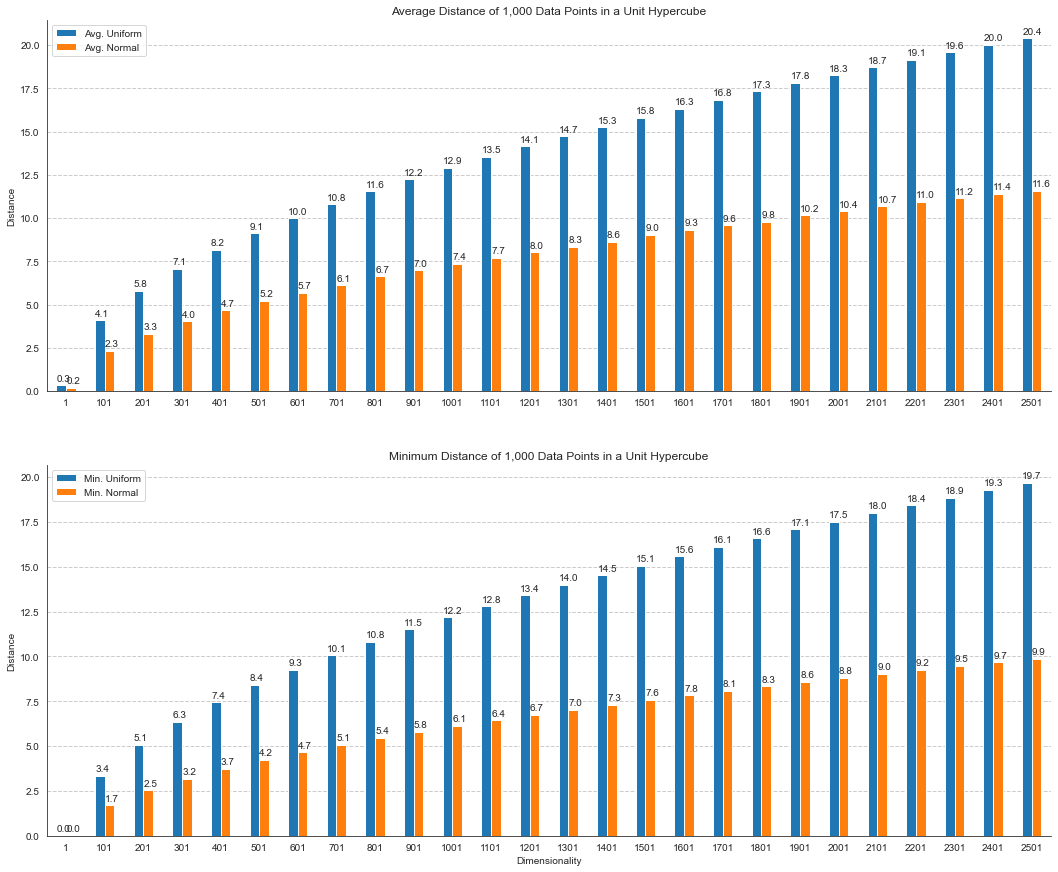

In [25]:
# Plot Average and Minimum Distance of Points in Unit Hypercube
title = 'Distance of {:,.0f} Data Points in a Unit Hypercube'.format(n_points)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(18, 15))
distances[[ 'Avg. Uniform', 'Avg. Normal']].plot.bar(title='Average ' + title, ax=axes[0], rot=0)
distances[[ 'Min. Uniform', 'Min. Normal']].plot.bar(title='Minimum ' + title, ax=axes[1], rot=0)

for ax in axes:
    ax.grid(axis='y', lw=1, ls='--')
    for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + .005, p.get_height() + .25), fontsize=10)
    ax.set_ylabel('Distance')

axes[1].set_xlabel('Dimensionality')
sns.despine()